In [151]:
import torch
import numpy as np
from time import time
import torch.utils.data as Data
import torch.nn as nn

In [152]:
a = torch.ones(1000)
b = torch.ones(1000)
start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
print(time() - start)

start = time()
d = a + b
print(time() - start) 

0.015386819839477539
9.107589721679688e-05


In [153]:
a = torch.ones(3) 
b = 10
print(a + b)

tensor([11., 11., 11.])


In [154]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random


In [155]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0, 1, (num_examples,num_inputs)))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] +true_b
labels += torch.from_numpy(np.random.normal(0, 0.01,size=labels.size()))

print(features.size())
print(labels.size())
print(features[0], labels[0])


torch.Size([1000, 2])
torch.Size([1000])
tensor([-0.4818, -0.4562], dtype=torch.float64) tensor(4.7898, dtype=torch.float64)


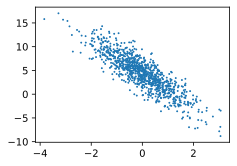

In [156]:
def use_svg_display():
    # ⽤⽮量图显示
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺⼨
    plt.rcParams['figure.figsize'] = figsize
    
# # 在../d2lzh_pytorch⾥⾯添加上⾯两个函数后就可以这样导⼊
# import sys
# sys.path.append("..")
# from d2lzh_pytorch import *
set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

In [157]:
def data_iter_(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size,num_examples)]) # 最后⼀次可能不⾜⼀个batch
        yield features.index_select(0, j), labels.index_select(0, j)

In [158]:
batch_size = 10
for X, y in data_iter_(batch_size, features, labels):
    print(X, y)
    break

tensor([[-0.9833, -0.9152],
        [ 0.3425,  1.6436],
        [-0.1204, -1.0671],
        [ 0.2862, -2.4733],
        [-0.7656, -2.2357],
        [ 0.9152,  0.3332],
        [-0.9937, -0.2931],
        [ 0.1825,  0.3158],
        [-0.1352, -0.7735],
        [-0.9562, -1.4278]], dtype=torch.float64) tensor([ 5.3252, -0.7177,  7.5920, 13.1851, 10.2602,  4.9108,  3.2318,  3.4722,
         6.5623,  7.1276], dtype=torch.float64)


In [159]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)),dtype=torch.float32) 
b = torch.zeros(1, dtype=torch.float32)

In [160]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [161]:
def linreg(X, w, b): # 本函数已保存在d2lzh_pytorch包中⽅便以后使⽤
    X = torch.tensor(X, dtype=torch.float32)
    return torch.mm(X, w) + b   

In [162]:
def squared_loss(y_hat, y): # 本函数已保存在d2lzh_pytorch包中⽅便以后使⽤
    # 注意这⾥返回的是向量, 另外, pytorch⾥的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [163]:
def sgd(params, lr, batch_size): # 本函数已保存在d2lzh_pytorch包中⽅便以后使⽤
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这⾥更改param时⽤的param.data

In [164]:
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss



for epoch in range(num_epochs): # 训练模型⼀共需要num_epochs个迭代周期
    
    # 在每⼀个迭代周期中，会使⽤训练数据集中所有样本⼀次（假设样本数能够被批量⼤⼩整除）。

    # X和y分别是⼩批量样本的特征和标签
    for X, y in data_iter_(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum() # l是有关⼩批量X和y的损失
        l.backward() # ⼩批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size) # 使⽤⼩批量随机梯度下降迭代模型参数
        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

/Users/yuxiang/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


epoch 1, loss 0.029534
epoch 2, loss 0.000106
epoch 3, loss 0.000054
epoch 4, loss 0.000054
epoch 5, loss 0.000054
epoch 6, loss 0.000054
epoch 7, loss 0.000054
epoch 8, loss 0.000054
epoch 9, loss 0.000054
epoch 10, loss 0.000054


In [165]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 2.0007],
        [-3.4002]], requires_grad=True)
4.2 
 tensor([4.1997], requires_grad=True)


In [166]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples,num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] +true_b
labels += torch.tensor(np.random.normal(0, 0.01,size=labels.size()), dtype=torch.float)

In [167]:
batch_size = 10
dataset = Data.TensorDataset(features,labels)
data_iter = Data.DataLoader(dataset,batch_size,shuffle=True)

In [168]:
for X,y in data_iter:
    print(X,y)
    break

tensor([[-0.4779,  0.3059],
        [-2.3009,  1.4124],
        [ 0.0981, -0.3524],
        [-0.9616, -0.9183],
        [-0.4089,  1.6407],
        [-0.2887,  1.1353],
        [-1.2107, -1.1649],
        [-0.8500, -1.3009],
        [-1.0754, -0.6914],
        [ 0.6917,  1.6846]]) tensor([ 2.2008, -5.1951,  5.6008,  5.4014, -2.2019, -0.2529,  5.7473,  6.9229,
         4.3995, -0.1379])


In [169]:
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)
    # forward 定义前向传播
    def forward(self, x):
        y = self.linear(x)
        return y
net = LinearNet(num_inputs)
print(net) # 使⽤print可以打印出⽹络的结构

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [170]:
# method one
net = nn.Sequential(
    nn.Linear(num_inputs,1)
    )

# method two
net = nn.Sequential()
net.add_module('Linear',nn.Linear(num_inputs,1))

# method three
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
    ('Linear',nn.Linear(num_inputs,1))
]))
print(net)
print(net[0])

Sequential(
  (Linear): Linear(in_features=2, out_features=1, bias=True)
)
Linear(in_features=2, out_features=1, bias=True)


In [171]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[ 0.0359, -0.5019]], requires_grad=True)
Parameter containing:
tensor([-0.3570], requires_grad=True)


In [172]:
from torch.nn import init

init.normal_(net[0].weight,mean=0,std=0.01)
init.constant_(net[0].bias,val=0)
net[0].bias.data.fill_(0),

(tensor([0.]),)

In [173]:
loss = nn.MSELoss()


In [174]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(),lr=0.03)

# optimizer =optim.SGD([
# # 如果对某个参数不指定学习率，就使⽤最外层的默认学习率
#          {'params': net.subnet1.parameters()}, # lr=0.03
#          {'params': net.subnet2.parameters(), 'lr': 0.01}
#      ], lr=0.03)

# # 调整学习率
# for param_group in optimizer.param_groups:
#     param_group['lr'] *= 0.1 # 学习率为之前的0.1倍

In [175]:
num_epochs = 3
for epoch in range(1,num_epochs+1):
    for X,y in data_iter:
        output = net(X)
        l = loss(output,y.view(-1,1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))

epoch 1, loss: 0.000216
epoch 2, loss: 0.000031
epoch 3, loss: 0.000081


In [176]:
dense = net[0]
print(true_w, dense.weight)
print(true_b, dense.bias)

[2, -3.4] Parameter containing:
tensor([[ 1.9995, -3.4002]], requires_grad=True)
4.2 Parameter containing:
tensor([4.1997], requires_grad=True)
